## `19IT031 Aman Desai`

## Practical - 8 

## `Implement Convolutional neural network for hand written digits classification. Tune it and compare it with practical 7.`

## `Apply Convolutional neural network on image classification data of your choice and write all steps for hyper parameter optimization. (use Keras library)`

### Implement Convolutional neural network for hand written digits classification. Tune it and compare it with practical 7.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import MaxPool2D

In [2]:
# Lets limit the GPU
import os

os.environ['CUDA_VISIBLE_DEVICES'] = "0"
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2048)])
    except RuntimeError as e:
        print(e)

In [3]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


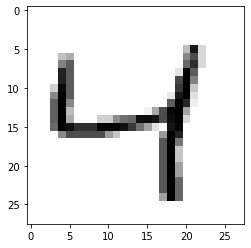

In [4]:
plt.imshow(x_train[2], cmap='binary')

In [5]:
# reshape dataset to have a single channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32')
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32')

In [6]:
x_train /= 255
x_test /= 255

In [7]:
# Creating model
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation = 'softmax'))

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 35s 9ms/step - loss: 0.3309 - accuracy: 0.8931
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0617 - accuracy: 0.9810
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0449 - accuracy: 0.9859
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0366 - accuracy: 0.9889
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0338 - accuracy: 0.9895
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0265 - accuracy: 0.9918
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0264 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0248 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0196 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 18s 10ms/step

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0

In [11]:
score = model.evaluate(x_test, y_test)
print(f"Loss and Accuracy: {score}")

313/313 [==============================] - 3s 8ms/step - loss: 0.0224 - accuracy: 0.9938
Loss and Accuracy: [0.022447854280471802, 0.9937999844551086]


Here in Practical 8 we got an accuracy of 99.38% by using CNN which is comparatively greater then what we got in Practical 7 which was 92.21% by using ANN.

In [13]:
loss = history.history['loss']
accuracy = history.history['accuracy']

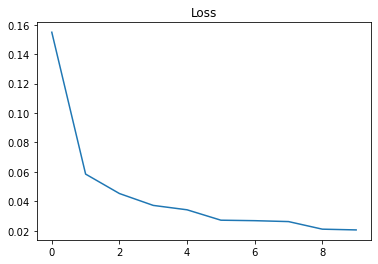

In [14]:
plt.plot(loss)
plt.title('Loss')
plt.show()

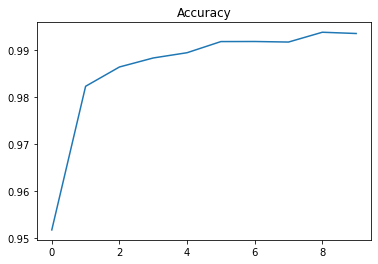

In [15]:
plt.plot(accuracy)
plt.title('Accuracy')
plt.show()

### Apply Convolutional neural network on image classification data of your choice and write all steps for hyper parameter optimization. (use Keras library)


Here is the link of a CNN based project of Indian Sign Language recognition created by me as SGP Project. 
Github Link: `https://github.com/AmanDesai10/Indian-Sign-Language-Recognition/blob/main/alpha-model_train.py`
Demo Youtube Video: `https://youtu.be/anp1JLHnMP0`

## Conclusion:

* By performing this practical i learned about Convolutional neural network and implemented it. Also plotted accuracy and loss graph of the trained model and also compared it with ANN model's accuracy. 